In [1]:
import pandas as pd
import datetime
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline 

In [3]:
targetdir = "./data/DailyVolume/"
filename = "daily_volume_per_cat.csv"

df = pd.read_csv(targetdir + filename)

In [4]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["date"])

In [5]:
df

,date,category,dailyVolume
0,2017-11-23,Art,2.448360e+03
1,2017-11-24,Art,4.376310e+03
2,2017-11-25,Art,5.884876e+03
3,2017-11-26,Art,1.525991e+03
4,2017-11-27,Art,1.654776e+03
...,...,...,...
6290,2021-04-27,Games,4.827725e+05
6292,2021-04-27,Other,2.005706e+05
6288,2021-04-27,Art,6.887456e+06
6289,2021-04-27,Collectible,1.517398e+06


In [11]:
df[df["date"] < "2018-01-01"]["dailyVolume"].sum()

18276708.636673223

In [18]:
df[(df["date"] >= "2021-01-01") & (df["date"] < "2022-01-01")]["dailyVolume"].sum()

750205223.5506289

In [7]:
df[df["date"] == "2018-10-11"]

,date,category,dailyVolume
967,2018-10-11,Art,12266.123265
968,2018-10-11,Collectible,182.341027
969,2018-10-11,Games,1349.239269
970,2018-10-11,Metaverse,100017.406500


In [8]:
pivoted_df = df.pivot(index='date', columns='category', values='dailyVolume').fillna(0).reset_index()

pivoted_df["Total"] = pivoted_df["Art"] + pivoted_df["Collectible"] + pivoted_df["Games"] + pivoted_df["Metaverse"] +\
                      pivoted_df["Other"]+pivoted_df["Utility"]
pivoted_df

category,date,Art,Collectible,Games,Metaverse,Other,Utility,Total
0,2017-11-23,2.448360e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.448360e+03
1,2017-11-24,4.376310e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.376310e+03
2,2017-11-25,5.884876e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.884876e+03
3,2017-11-26,1.525991e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.525991e+03
4,2017-11-27,1.654776e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.654776e+03
...,...,...,...,...,...,...,...,...
1247,2021-04-23,4.464176e+06,1.415597e+06,490630.053115,541139.824079,125127.327922,56036.871363,7.092707e+06
1248,2021-04-24,3.405176e+06,1.100380e+06,391964.198682,478067.797379,115781.768293,22866.739725,5.514237e+06
1249,2021-04-25,2.869498e+06,9.255727e+05,421942.281237,468168.196608,171929.217916,29546.677180,4.886657e+06
1250,2021-04-26,2.985981e+06,1.226754e+06,431356.352100,284309.092889,160343.926596,37557.524165,5.126302e+06


In [15]:
pivoted_df[(pivoted_df["date"] > "2018-12-01")][:10]

category,date,Art,Collectible,Games,Metaverse,Other,Utility,Total
374,2018-12-02,30986.803053,518.891236,1590.080663,21675.406188,5.825250,0.0,54777.006390
375,2018-12-03,5309.065334,144.611596,1105.452448,22774.898055,58.144738,0.0,29392.172171
376,2018-12-04,8544.002417,282.432561,1211.843983,32066.322260,6.059900,0.0,42110.661120
377,2018-12-05,12389.663445,276.167682,2306.057844,36682.666632,418.907780,0.0,52073.463383
378,2018-12-06,5566.967119,481.552366,3235.874198,13402.956544,382.493755,0.0,23069.843982
379,2018-12-07,5896.634474,1252.949996,2506.523116,41598.700532,332.325840,0.0,51587.133957
380,2018-12-08,9103.930153,548.458997,2699.589777,26972.514175,1594.027725,0.0,40918.520828
381,2018-12-09,7525.178396,488.113042,2603.828595,23688.721670,640.474128,0.0,34946.315832
382,2018-12-10,4170.839237,770.516849,1662.644781,72482.307185,49.404250,0.0,79135.712302
383,2018-12-11,5235.208607,375.255618,1885.082092,336086.148408,25.829809,0.0,343607.524534


In [18]:
pivoted_df[(pivoted_df["date"] > "2020-07-01") & (pivoted_df["date"] < "2021-01-01")].sort_values(["Total"],ascending=False)

category,date,Art,Collectible,Games,Metaverse,Other,Utility,Total
1026,2020-09-14,256479.187933,24863.175375,17815.634449,6262.609500,9150.337143,1.525194e+06,1.839765e+06
1099,2020-11-26,970062.299066,71594.095858,74678.347843,53015.451661,37331.323618,2.939641e+03,1.209621e+06
1040,2020-09-28,782927.355807,55182.538219,169102.655471,100176.083000,10805.459982,2.415816e+04,1.142352e+06
1036,2020-09-24,651882.658510,57230.584437,203148.276569,9157.693006,12817.187733,2.467972e+04,9.589161e+05
1123,2020-12-20,369662.321287,139780.200196,70976.170628,305909.370870,8754.097909,4.343498e+03,8.994257e+05
...,...,...,...,...,...,...,...,...
952,2020-07-02,15606.075928,986.889250,8627.095023,12830.256224,1246.807893,2.485418e+03,4.178254e+04
954,2020-07-04,16397.730212,3129.003101,7165.123986,11546.841390,1195.522048,1.097572e+02,3.954398e+04
953,2020-07-03,16189.535776,2598.601644,9527.189275,7727.306454,883.083122,1.840296e+02,3.710975e+04
955,2020-07-05,7153.896716,1607.352765,11259.142541,14895.083017,1139.717602,5.579414e+01,3.611099e+04


In [10]:
pivoted_df[pivoted_df["date"] > "2018-12-01"][:20]

category,date,Art,Collectible,Games,Metaverse,Other,Utility,Total
374,2018-12-02,30986.803053,518.891236,1590.080663,21675.406188,5.825250,0.0,54777.006390
375,2018-12-03,5309.065334,144.611596,1105.452448,22774.898055,58.144738,0.0,29392.172171
376,2018-12-04,8544.002417,282.432561,1211.843983,32066.322260,6.059900,0.0,42110.661120
377,2018-12-05,12389.663445,276.167682,2306.057844,36682.666632,418.907780,0.0,52073.463383
378,2018-12-06,5566.967119,481.552366,3235.874198,13402.956544,382.493755,0.0,23069.843982
379,2018-12-07,5896.634474,1252.949996,2506.523116,41598.700532,332.325840,0.0,51587.133957
380,2018-12-08,9103.930153,548.458997,2699.589777,26972.514175,1594.027725,0.0,40918.520828
381,2018-12-09,7525.178396,488.113042,2603.828595,23688.721670,640.474128,0.0,34946.315832
382,2018-12-10,4170.839237,770.516849,1662.644781,72482.307185,49.404250,0.0,79135.712302
383,2018-12-11,5235.208607,375.255618,1885.082092,336086.148408,25.829809,0.0,343607.524534


In [34]:
pivoted_df[(pivoted_df["Art"] <= pivoted_df["Games"]) & (pivoted_df["Metaverse"] <= pivoted_df["Games"])][:20]

category,date,Art,Collectible,Games,Metaverse,Other,Utility
405,2019-01-02,5152.720454,298.838449,12267.576888,10511.647939,4.771935,0.000000
419,2019-01-16,3604.947626,156.986429,9283.109066,6766.963790,126.614925,0.000000
422,2019-01-19,4048.131844,136.577821,16549.433958,16465.725474,24.468380,0.000000
423,2019-01-20,7151.843246,330.358751,8941.306513,5504.874700,147.938450,0.000000
429,2019-01-26,5579.974173,390.241128,12204.953323,4597.117800,48.407326,0.000000
430,2019-01-27,7976.708917,453.417923,16435.597867,8380.571150,41.058000,0.000000
434,2019-01-31,1914.465806,188.703639,10340.201769,8592.727560,1496.920187,0.000000
435,2019-02-01,2034.303546,1026.673958,12474.644368,3383.844500,3775.113099,0.000000
436,2019-02-02,4072.774155,632.448491,11408.097360,8706.114355,137.802464,0.000000
437,2019-02-03,2662.726669,613.747332,14870.607993,10583.788405,1610.614749,0.000000


In [16]:
pivoted_df[(pivoted_df["date"] >= "2019-11-24")]

category,date,Art,Collectible,Games,Metaverse,Other,Utility,Total
731,2019-11-24,4.220276e+03,4.224812e+02,98213.489394,11367.947745,100.470717,0.000000,1.143247e+05
732,2019-11-25,3.647589e+03,1.609452e+01,76078.942196,8660.908786,273.118218,0.000000,8.867665e+04
733,2019-11-26,1.961945e+03,8.342805e+01,58582.342346,19163.650815,356.553688,5459.720000,8.560764e+04
734,2019-11-27,1.873940e+03,5.236163e+01,87162.369502,17412.746321,525.184488,0.000000,1.070266e+05
735,2019-11-28,2.020346e+03,3.067401e+01,86985.974497,7029.048238,343.242548,0.000000,9.640929e+04
...,...,...,...,...,...,...,...,...
1247,2021-04-23,4.464176e+06,1.415597e+06,490630.053115,541139.824079,125127.327922,56036.871363,7.092707e+06
1248,2021-04-24,3.405176e+06,1.100380e+06,391964.198682,478067.797379,115781.768293,22866.739725,5.514237e+06
1249,2021-04-25,2.869498e+06,9.255727e+05,421942.281237,468168.196608,171929.217916,29546.677180,4.886657e+06
1250,2021-04-26,2.985981e+06,1.226754e+06,431356.352100,284309.092889,160343.926596,37557.524165,5.126302e+06


In [53]:
pivoted_df[(pivoted_df["date"] >= "2021-09-01") & (pivoted_df["date"] <= "2020-12-31")]["Total"].mean()

476017.96154812

In [56]:
pivoted_df[(pivoted_df["date"] >= "2021-01-01")]["Total"].mean()

6412010.457697681

In [57]:
pivoted_df[(pivoted_df["date"] >= "2021-01-01")][:40]

category,date,Art,Collectible,Games,Metaverse,Other,Utility,Total
1135,2021-01-01,3.945272e+05,87933.045026,62580.555740,12804.214457,8429.180521,1177.892444,5.674521e+05
1136,2021-01-02,2.210225e+05,91294.064440,108644.930628,19942.318514,7696.503245,753.287470,4.493536e+05
1137,2021-01-03,2.295624e+05,111589.662003,86893.067518,20307.224466,41988.514748,4871.659920,4.952125e+05
1138,2021-01-04,1.942876e+05,161017.324422,36999.544933,784702.255597,14344.685761,2652.153120,1.194004e+06
1139,2021-01-05,3.352711e+05,115017.073454,33463.533796,4474.269857,109308.345731,1407.318149,5.989417e+05
1140,2021-01-06,6.387056e+05,128152.588493,41770.008521,263381.579095,10048.168688,1428.632923,1.083487e+06
1141,2021-01-07,3.746463e+05,136758.657623,51657.208477,18819.225815,10207.510952,8680.302270,6.007692e+05
1142,2021-01-08,2.965549e+05,138910.704822,46887.769008,102557.464469,7440.002400,2050.068790,5.944009e+05
1143,2021-01-09,4.359541e+05,106077.320567,155953.772234,28793.242623,5217.536559,11457.180866,7.434532e+05
1144,2021-01-10,7.409279e+05,117018.440075,36263.438775,157214.314954,6489.110921,13595.958125,1.071509e+06


In [50]:
pivoted_df[(pivoted_df["Total"] < 500000) & (pivoted_df["date"] > "2020-09-01")][:90]

category,date,Art,Collectible,Games,Metaverse,Other,Utility,Total
1014,2020-09-02,15272.817949,54566.580944,9543.618060,0.000000,2663.341941,0.000000,82046.358895
1015,2020-09-03,17668.517300,40841.340421,35252.826756,3225.566221,4306.858493,103.194990,101398.304180
1016,2020-09-04,29274.263316,25633.945671,19416.696114,1403.006375,1001.545460,1605.773290,78335.230226
1017,2020-09-05,9396.305585,27400.410899,22041.621659,12315.749708,1125.786505,780.846118,73060.720472
1018,2020-09-06,90898.723586,26910.633598,19794.005728,15923.538195,1262.916409,1549.876972,156339.694487
...,...,...,...,...,...,...,...,...
1136,2021-01-02,221022.532025,91294.064440,108644.930628,19942.318514,7696.503245,753.287470,449353.636323
1137,2021-01-03,229562.413250,111589.662003,86893.067518,20307.224466,41988.514748,4871.659920,495212.541905
1145,2021-01-11,206877.178288,89188.137990,38621.190410,16936.514920,6198.920430,8322.869802,366144.811840
1146,2021-01-12,280068.136039,136784.294750,50645.660707,19949.551137,8741.122080,553.746778,496742.511491


In [6]:
df.iloc[-10:]

,date,category,dailyVolume
6283,2021-04-26,Collectible,1.226754e+06
6284,2021-04-26,Games,4.313564e+05
6285,2021-04-26,Metaverse,2.843091e+05
6287,2021-04-26,Utility,3.755752e+04
6291,2021-04-27,Metaverse,4.097867e+05
6290,2021-04-27,Games,4.827725e+05
6292,2021-04-27,Other,2.005706e+05
6288,2021-04-27,Art,6.887456e+06
6289,2021-04-27,Collectible,1.517398e+06
6293,2021-04-27,Utility,4.867372e+04


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6294 entries, 0 to 6293
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6294 non-null   datetime64[ns]
 1   category     6294 non-null   object        
 2   dailyVolume  6293 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 196.7+ KB


In [13]:
art_df = df[df["category"] == "Art"]
art_df_rolling = art_df.rolling(window="30D", on="date").mean()
art_df_rolling.info()
art_df_rolling

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 6288
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1252 non-null   datetime64[ns]
 1   dailyVolume  1252 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.3 KB


,date,dailyVolume
0,2017-11-23,2.448360e+03
1,2017-11-24,3.412335e+03
2,2017-11-25,4.236515e+03
3,2017-11-26,3.558884e+03
4,2017-11-27,3.178062e+03
...,...,...
6264,2021-04-23,5.476695e+06
6270,2021-04-24,5.425526e+06
6276,2021-04-25,5.372498e+06
6282,2021-04-26,5.307257e+06


In [14]:
collectible_df = df[df["category"] == "Collectible"]
collectible_df_rolling = collectible_df.rolling(window="30D", on="date").mean()
collectible_df_rolling.info()
collectible_df_rolling

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 74 to 6289
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1097 non-null   datetime64[ns]
 1   dailyVolume  1097 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.7 KB


,date,dailyVolume
74,2018-02-04,1.533359e+03
76,2018-02-05,1.281905e+04
78,2018-02-06,9.115165e+03
80,2018-02-07,9.080274e+03
82,2018-02-08,1.623870e+04
...,...,...
6265,2021-04-23,1.076916e+06
6271,2021-04-24,1.088650e+06
6277,2021-04-25,1.095456e+06
6283,2021-04-26,1.108481e+06


In [15]:
games_df = df[df["category"] == "Games"]
games_df_rolling = games_df.rolling(window="30D", on="date").mean()
games_df_rolling

,date,dailyVolume
151,2018-03-10,0.713235
162,2018-03-15,3.337967
199,2018-03-29,3.883012
216,2018-04-05,38.573532
219,2018-04-06,132.204050
...,...,...
6266,2021-04-23,832510.276114
6272,2021-04-24,836354.641501
6278,2021-04-25,837748.303706
6284,2021-04-26,840562.161837


In [16]:
metaverse_df = df[df["category"] == "Metaverse"]
metaverse_df_rolling = metaverse_df.rolling(window="30D", on="date").mean()
metaverse_df_rolling

,date,dailyVolume
460,2018-06-12,177.471906
480,2018-06-18,122.182495
485,2018-06-19,205.941767
489,2018-06-20,282.276147
494,2018-06-21,246.573315
...,...,...
6267,2021-04-23,708579.098619
6273,2021-04-24,714084.297017
6279,2021-04-25,717549.793320
6285,2021-04-26,703960.054506


In [17]:
other_df = df[df["category"] == "Other"]
other_df_rolling = other_df.rolling(window="30D", on="date").mean()
other_df_rolling

,date,dailyVolume
98,2018-02-16,597.838955
100,2018-02-17,364.418503
103,2018-02-18,284.060622
105,2018-02-19,215.379491
110,2018-02-21,293.407339
...,...,...
6268,2021-04-23,187952.345498
6274,2021-04-24,184365.892687
6280,2021-04-25,181867.571810
6286,2021-04-26,179853.159169


In [18]:
utility_df = df[df["category"] == "Utility"]
utility_df_rolling = utility_df.rolling(window="30D", on="date").mean()
utility_df_rolling

,date,dailyVolume
1573,2019-02-11,58.720055
1619,2019-02-20,3275.438046
1630,2019-02-22,6358.770503
1636,2019-02-23,4788.771002
1642,2019-02-24,3845.139302
...,...,...
6269,2021-04-23,71070.226600
6275,2021-04-24,70749.107416
6281,2021-04-25,70938.888926
6287,2021-04-26,71393.106765


In [19]:
all_df_rolling = art_df_rolling.set_index('date')\
    .join(other=collectible_df_rolling.set_index('date'), on=["date"], 
          how='outer', sort=True, lsuffix='_art', rsuffix='_collectible') \
    .join(other=games_df_rolling.set_index('date'), on=["date"], 
          how='outer', sort=True) \
    .join(other=metaverse_df_rolling.set_index('date'), on=["date"], 
          how='outer', sort=True, lsuffix='_games', rsuffix='_metaverse') \
    .join(other=other_df_rolling.set_index('date'), on=["date"], 
          how='outer', sort=True) \
    .join(other=utility_df_rolling.set_index('date'), on=["date"], 
          how='outer', sort=True, lsuffix='_other', rsuffix='_utility').reset_index()

all_df_rolling.fillna(0, inplace=True)

all_df_rolling["dailyVolume"] = all_df_rolling.dailyVolume_art + all_df_rolling.dailyVolume_collectible + \
                  all_df_rolling.dailyVolume_games + all_df_rolling.dailyVolume_metaverse + \
                  all_df_rolling.dailyVolume_other + all_df_rolling.dailyVolume_utility

all_df_rolling = all_df_rolling[["date", "dailyVolume"]]
all_df_rolling

,date,dailyVolume
0,2017-11-23,2.448360e+03
1,2017-11-24,3.412335e+03
2,2017-11-25,4.236515e+03
3,2017-11-26,3.558884e+03
4,2017-11-27,3.178062e+03
...,...,...
1247,2021-04-23,8.353723e+06
1248,2021-04-24,8.319730e+06
1249,2021-04-25,8.276058e+06
1250,2021-04-26,8.211507e+06


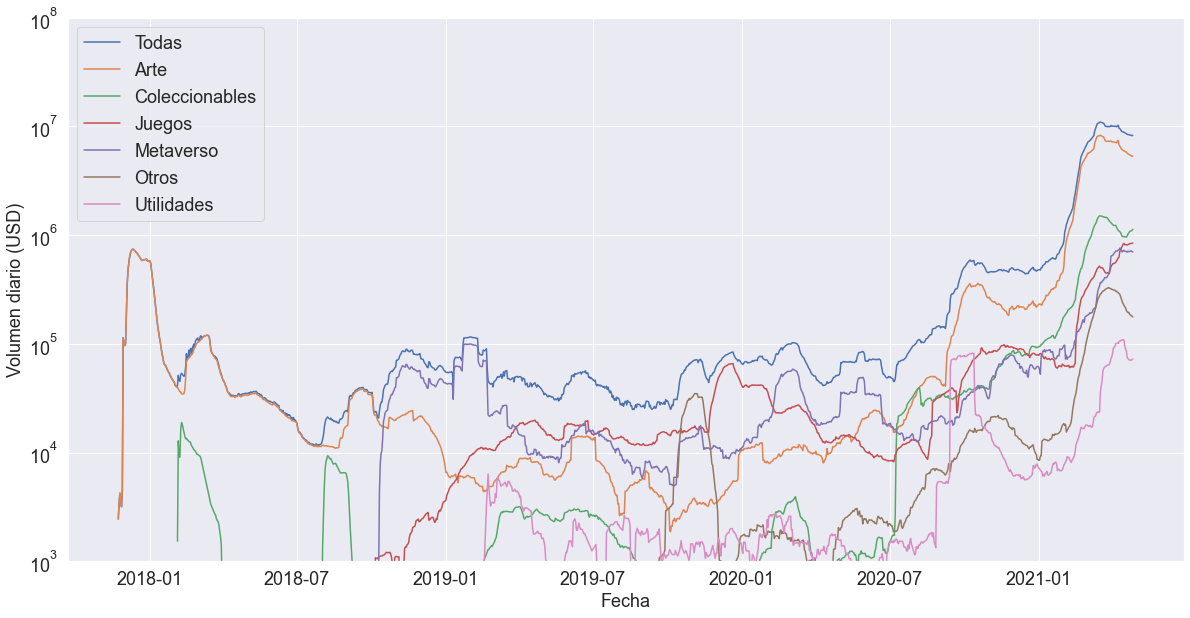

In [21]:
fig = plt.figure()

for frame in [all_df_rolling, art_df_rolling, collectible_df_rolling, games_df_rolling, metaverse_df_rolling, 
              other_df_rolling, utility_df_rolling]:
    plt.plot(frame['date'], frame['dailyVolume'])
    

#plt.xscale('log')
plt.yscale('log')
plt.ylim(1000, 10e7)

#plt.xticks([2018, 2019, 2020, 2021])
plt.xlabel("Fecha", fontsize=18)
plt.ylabel("Volumen diario (USD)", fontsize=18)
plt.legend(["Todas", "Arte", "Coleccionables", "Juegos", "Metaverso", "Otros", "Utilidades"], prop={'size': 18},
           loc="upper left")

plt.rcParams["figure.figsize"] = (20,15)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

plt.savefig("./dailyVolume/dailyVolume.svg", bbox_inches='tight')

plt.show()

# Without rolling window

In [24]:
all_df = art_df.set_index('date')\
    .join(other=collectible_df.set_index('date'), on=["date"], 
          how='outer', sort=True, lsuffix='_art', rsuffix='_collectible') \
    .join(other=games_df.set_index('date'), on=["date"], 
          how='outer', sort=True) \
    .join(other=metaverse_df.set_index('date'), on=["date"], 
          how='outer', sort=True, lsuffix='_games', rsuffix='_metaverse') \
    .join(other=other_df.set_index('date'), on=["date"], 
          how='outer', sort=True) \
    .join(other=utility_df.set_index('date'), on=["date"], 
          how='outer', sort=True, lsuffix='_other', rsuffix='_utility').reset_index()

all_df.fillna(0, inplace=True)

all_df["dailyVolume"] = all_df.dailyVolume_art + all_df.dailyVolume_collectible + \
                  all_df.dailyVolume_games + all_df.dailyVolume_metaverse + \
                  all_df.dailyVolume_other + all_df.dailyVolume_utility

all_df = all_df[["date", "dailyVolume"]]
all_df

,date,dailyVolume
0,2017-11-23,2.448360e+03
1,2017-11-24,4.376310e+03
2,2017-11-25,5.884876e+03
3,2017-11-26,1.525991e+03
4,2017-11-27,1.654776e+03
...,...,...
1247,2021-04-23,7.092707e+06
1248,2021-04-24,5.514237e+06
1249,2021-04-25,4.886657e+06
1250,2021-04-26,5.126302e+06


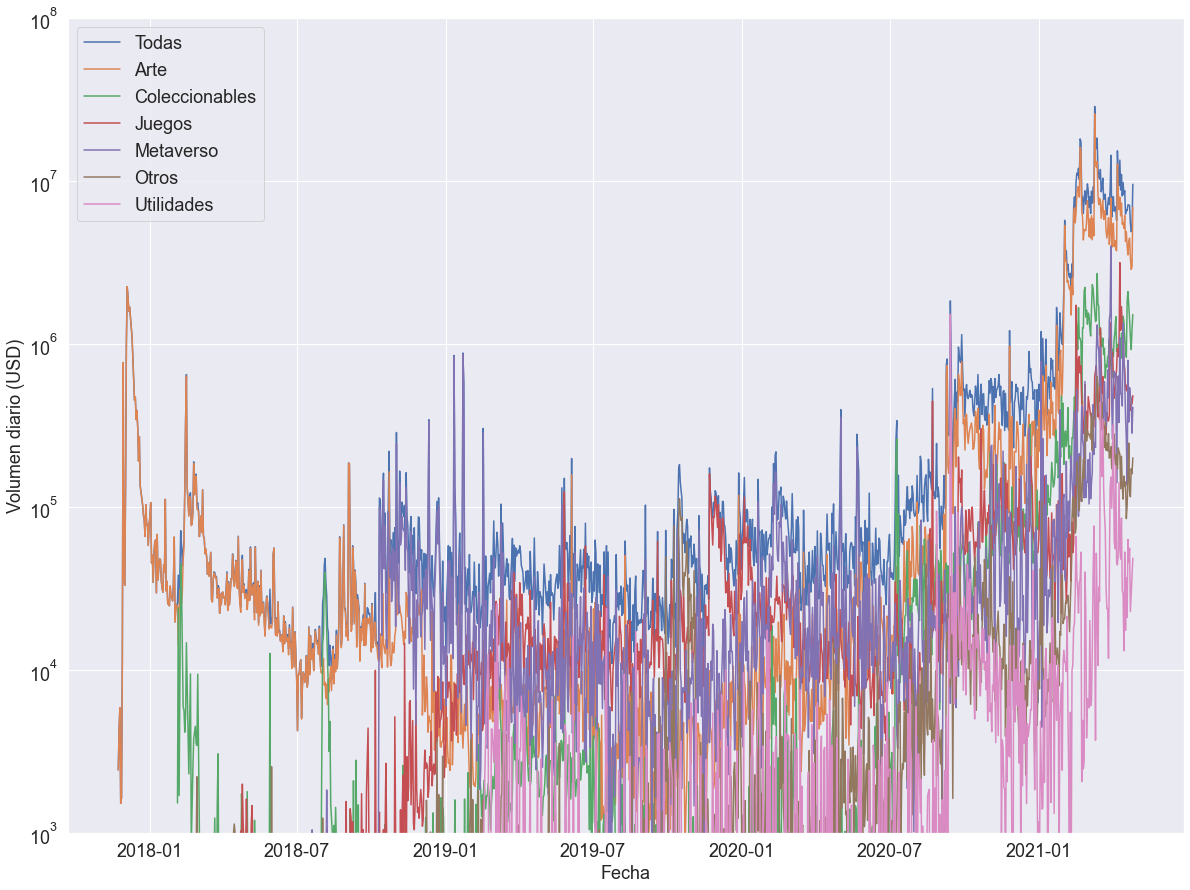

In [25]:
fig = plt.figure()

for frame in [all_df, art_df, collectible_df, games_df, metaverse_df,
              other_df, utility_df]:
    plt.plot(frame['date'], frame['dailyVolume'])
    

#plt.xscale('log')
plt.yscale('log')
plt.ylim(1000, 10e7)

#plt.xticks([2018, 2019, 2020, 2021])
plt.xlabel("Fecha", fontsize=18)
plt.ylabel("Volumen diario (USD)", fontsize=18)
plt.legend(["Todas", "Arte", "Coleccionables", "Juegos", "Metaverso", "Otros", "Utilidades"], prop={'size': 18},
           loc="upper left")

plt.rcParams["figure.figsize"] = (20,15)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

In [ ]:
all_df[all_df["date"]]

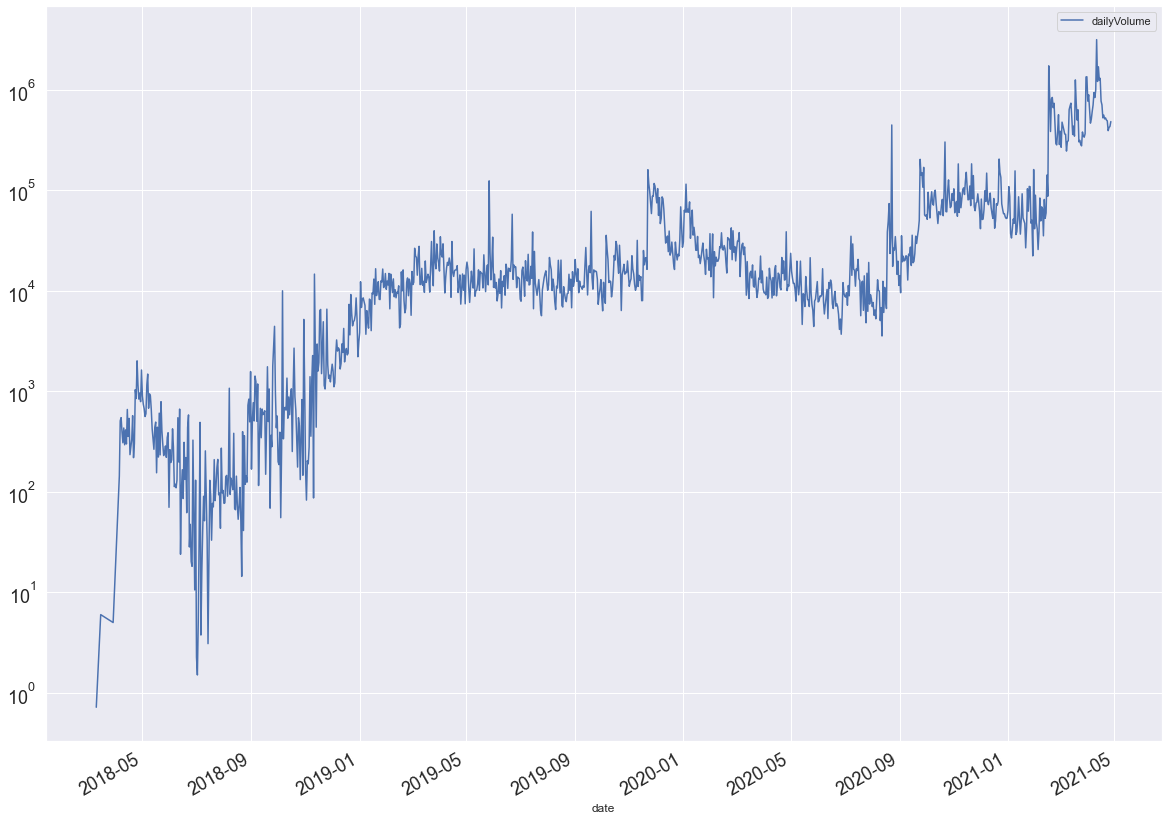

In [33]:
ax = games_df.plot(x='date', y='dailyVolume')
ax.set_yscale('log')

In [35]:
games_df[(games_df["dailyVolume"] > 100000) & (games_df["date"] > "2019-09-10") & (games_df["date"] < "2020-02-21")]

,date,category,dailyVolume
3176,2019-11-22,Games,160078.888438
3181,2019-11-23,Games,116325.378613
3213,2019-11-29,Games,116850.319689
3219,2019-11-30,Games,110090.733773
3237,2019-12-03,Games,103938.696487
3429,2020-01-04,Games,115013.628205


In [37]:
all_df[(all_df["date"] == "2019-11-22")]

,date,dailyVolume
729,2019-11-22,173956.86366


In [38]:
art_df[(art_df["date"] == "2019-11-22")]

,date,category,dailyVolume
3174,2019-11-22,Art,9917.848623
